## Project - Exchange Rates

The dataset we'll use for this project describes Euro daily exchange rates between 1999 and 2021. It can be found [here](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank.

![Image](https://images.unsplash.com/photo-1579532537598-459ecdaf39cc?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=774&q=80)
_Photo by Annie Spratt on Unsplash_

### Initial Exploration of the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exchange_rates=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 6/euro-daily-hist_1999_2020.csv")
print(exchange_rates.head())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
print(exchange_rates.tail())

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
5694   1999-01-08               1.8406              NaN               NaN   
5695   1999-01-07               1.8474              NaN               NaN   
5696   1999-01-06               1.8820              NaN               NaN   
5697   1999-01-05               1.8944              NaN               NaN   
5698   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
5694             1.7643         1.6138                      NaN   
5695             1.7602         1.6165                      NaN   
5696             1.7711         1.6116                      NaN   
5697             1.7965         1.6123                      NaN   
5698             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
5694          0.58187          34.938          7.4433  .

In [4]:
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 41 columns and 5699 rows of information. The data type of most columns is object so we need to convert them to float to be able to process them properly.

### Data Cleaning

In [5]:
#Renaming Columns
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
#Converting the Time column to a datetime data type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
#Sorting the values by Time in ascending order.
exchange_rates.sort_values('Time', inplace=True)
#Resetting the index
exchange_rates.reset_index(drop=True, inplace=True)


In [6]:
print(exchange_rates.head())

        Time [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0 1999-01-04               1.9100              NaN               NaN   
1 1999-01-05               1.8944              NaN               NaN   
2 1999-01-06               1.8820              NaN               NaN   
3 1999-01-07               1.8474              NaN               NaN   
4 1999-01-08               1.8406              NaN               NaN   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.8004         1.6168                      NaN          0.58231   
1             1.7965         1.6123                      NaN          0.58230   
2             1.7711         1.6116                      NaN          0.58200   
3             1.7602         1.6165                      NaN          0.58187   
4             1.7643         1.6138                      NaN          0.58187   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian rouble ]  \
0   

In [7]:
euro_to_dollar=exchange_rates[["Time", "US_dollar"]].copy()

In [8]:
print(euro_to_dollar["US_dollar"].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
0.9770     1
1.2486     1
1.0642     1
0.9164     1
1.3010     1
Name: US_dollar, Length: 3528, dtype: int64


In [9]:
#Dropping all the rows where the "-"" character appears in the US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
#converting the US_dollar column to a float data type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


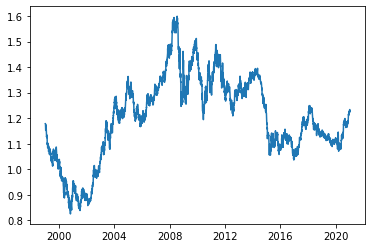

In [10]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

We are not interested in the daily variation in the exchange rate, but in the long-term trends. For this we will use the rolling mean to modify our plot.

### Rolling mean for the US_dollar column using a moving window of 30

In [11]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [12]:
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


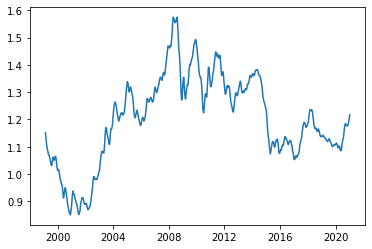

In [13]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

### Plotting a graph - storytelling data visualization

Next we will build a graph using the fivethirtyeight style to show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)).

In [104]:
bush_obama_trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)].copy(
                   )
bush = bush_obama_trump[bush_obama_trump['Time'].dt.year < 2009].copy()

obama = bush_obama_trump[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)].copy()
       
trump = bush_obama_trump[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)].copy()
       
print(bush_obama_trump["US_dollar"].describe())
print(bush_obama_trump["US_dollar"].mean())

count    5118.000000
mean        1.220209
std         0.153909
min         0.838400
25%         1.119800
50%         1.225800
75%         1.330875
max         1.599000
Name: US_dollar, dtype: float64
1.2202089292692502


<ipython-input-110-086dbc2febd4>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
<ipython-input-110-086dbc2febd4>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
<ipython-input-110-086dbc2febd4>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


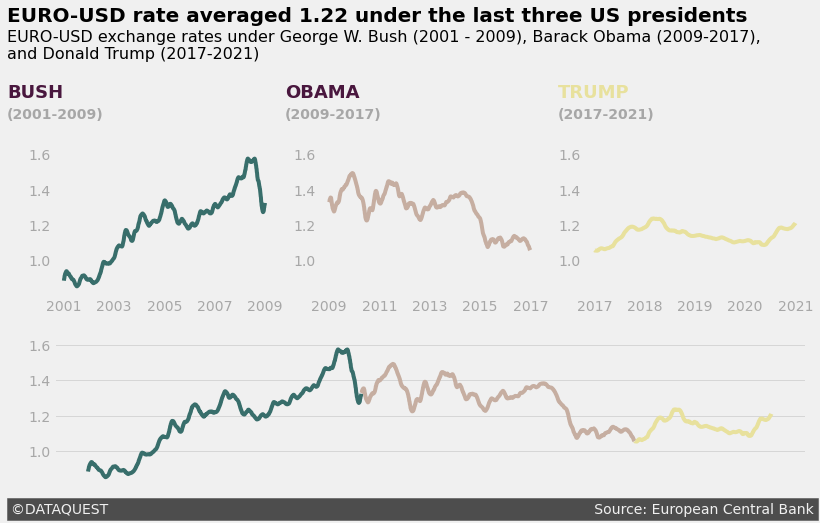

In [110]:
import matplotlib.style as style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### For all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    
    ax.grid(visible=False)

### Euro-dollar rate change during Bush
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#386e6b')

ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '','2007', '', '2009'],alpha=0.3)
ax1.text(10500, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#49173e')
ax1.text(10500, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

### Euro-dollar rate change during Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#c6aea1')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(13600,1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#49173e')
ax2.text(13600,1.8, '(2009-2017)', weight='bold',
         alpha=0.3)

### Euro-dollar rate change during Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#e8e19d')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(16900,1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#e8e19d')
ax3.text(16900,1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

###  Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#386e6b')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#c6aea1')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#e8e19d')

ax4.grid(visible=True,alpha=0.7)
ax4.set_xticks([])

### Title and subtitle
ax1.text(10500, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(10500.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Signature
ax4.text(10500,
         0.65, '©DATAQUEST' + ' '*108 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
plt.show()
